# PDC Bit 
Polycrystalline diamond materials, for use in polycrystalline diamond compact (PDC) bits, are one of the most important material advances for oil drilling tools in recent years. Fixed-head bits rotate as one piece and contain no separately moving parts. When fixed-head bits use PDC cutters, they are commonly called PDC bits. Since their first production in 1976, the popularity of bits using PDC cutters has grown steadily, and they are nearly as common as roller-cone bits in many drilling applications.


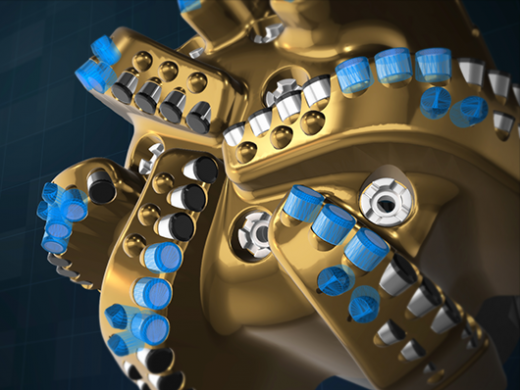
* In this Kernel a model was developed to simulates the PDC bit cutter interaction.
* The cutter positions including the distance from the bit center and hight are taken into account.
* The PDC cutter interaction model uses matrixes for simulating the position of cutters.
* The matrix is initialized with zero and is updated to new values taking the cutters positions into account.
* The regions with higher cutter interactions are lighter (white) compares to regions with less interactions (black).
* The computer model was developed in R. 
* The user can change the simulation resolution. Two visualiztions are presented in this Kernel.

1. Reference: https://petrowiki.org/PDC_drill_bits
2. Reference PDc bit picture: https://www.bhge.com/upstream/drilling/drill-bits/pdc-drill-bits

# Essential Libraries

In [1]:
require(lattice)
rm(list=ls())
NOC <- 15
Db <- 3.75
Dc <- 0.52 # cutter diamater in inches; chose round values!
Rc <- Dc/2
BR <- 0 # cutter back rake
#circle # 1 distance from bit center
R1 <- 3


Loading required package: lattice



# PDC Bit Cutter Interaction Computer Model 

In [2]:
# step 1
# define the size of matrix in accordance with the elements
# The matrix is named matrix base MB

Height  <- Dc*8 # the height of matrix in inches
Width <- Db*1.6/2 # the Width of matrix in inches

# step 2
#define the simulation resolution
elements <- 10 # 1 inches is equal to 100 elements

#define base matrix
BM <- matrix(0,Height*elements,Width*elements)



# step 3
#define the shape function (i.e. circle) and rearrange it base on x


#step 4
#define the min and max of shape in cartesian coordinate
#the circles are on top of x axie and therefore the y min is 0 and the y max is Dc

y_min_cartesian <- 0
y_max_cartesian <- Dc*cos(BR*pi/180)*3

#step 5
# turn y_min_cartesian & y_max_cartesian to elements
y_min_elements <- y_min_cartesian * elements
y_max_elements <- y_max_cartesian * elements



# start for y from down (y_min_elements=0)
# turn it to cartesian value; plug it into the circle equation
# calculate the x in cartesian; turn it back to elements
# turn both the y and x to Matrix base coordinate and update the Matrix base
# loop these procedure till get the maximum y element


Ri <- matrix(0,NOC,1)
Yi <- matrix(0,NOC,1)

y_min_cartesian <- matrix(0,NOC,1)
y_max_cartesian <- matrix(0,NOC,1)

y_min_elements <- matrix(0,NOC,1)
y_max_elements <- matrix(0,NOC,1)
#setwd("C:/Users/DASLAB Hareland 3/OneDrive - Oklahoma A and M System/R calc file/cutter interaction Modeling")
#setwd("/Users/amin/OneDrive - Oklahoma A and M System/R calc file/cutter interaction Modeling")

#CutterPositions <- read.csv('../input/full cutter position editted.csv', header = T)
CutterPositions <- read.csv('../input/full cutter position editted.csv', header = T)


#Cutters distance from the center/ Ri values
Ri[,1] <- CutterPositions[,1]
#Cutters distance from the botom of the bit/ Rc values
Yi[,1] <- CutterPositions[,2]

#ellipse paramters
# B <- cos(BR*pi/180)
# B2 <- B^2

y_min_cartesian <- Yi[,1] - Rc
y_max_cartesian <- Yi[,1] + Rc

y_min_elements <- ceiling(y_min_cartesian * elements)
y_max_elements <- floor(y_max_cartesian * elements)

for (n in 1:NOC) {
    #print(n)

    for (i in y_min_elements[n]:y_max_elements[n]) {
        # print(i)

        #turn y element to cartesian
        y_cartesian <- i/elements
        #shape equation rearraged base on x
        #circle
        x_cartesian_min <- -(Rc^2-((y_cartesian-Yi[n,1])^2))^0.5 + Ri[n,1]
        x_cartesian_max <- (Rc^2-((y_cartesian-Yi[n,1])^2))^0.5 + Ri[n,1]

        # ellipse
        # x_cartesian_min <- -((Rc^2)-(((y_cartesian-Rc)^2)/B2))^0.5 + Ri[n,1]
        # x_cartesian_max <- ((Rc^2)-(((y_cartesian-Rc)^2)/B2))^0.5 + Ri[n,1]

        #turn the x_cartesian_min&max to x_min_elementsmax
        x_min_elements <- ceiling(x_cartesian_min * elements)
        x_max_elements <- floor(x_cartesian_max * elements)
        #turn the y elements coordinate to base matrix coordinate (which would be x inside the matrix)
        X_BM <- -(i-elements * Height)
        #turn the x elements (min and max) to base matrix coordinate (which would be two ymin and ymax inside the matrix)
        y_BM_min <- x_min_elements
        y_BM_max <- x_max_elements

        #loop and update the Base matrix between y_BM_min & y_BM_max
        for (j in y_BM_min:y_BM_max) {
            # print(j)
            #add 1 unit to base matrix as repersentative for circle area
            BM[X_BM,j] <- BM[X_BM,j] - 1
        }
    }
}


# PDC Cutter Interaction Visualization

 num [1:41, 1:30] 0 0 0 0 0 0 0 0 0 0 ...


BM
  -4   -3   -2   -1    0 
   2   23   85   75 1045 

BM
-4 -3 -2 -1  0 
               

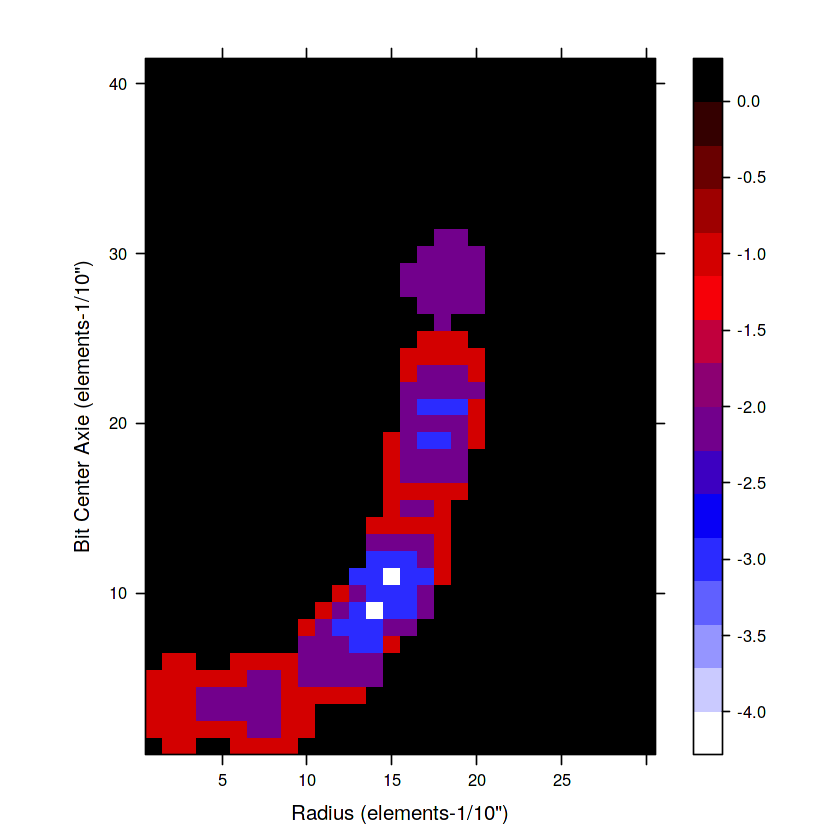

In [3]:

#replace those values that are greater than X all together in one line code
# BM <- ifelse(BM > -1, 8, BM)

str(BM)
BM1 <- t(BM)
BM2 <- BM1[,ncol(BM1):1]

col.l <- colorRampPalette(c('white','blue','red','black'))(30)

levelplot(BM2, xlab='Radius (elements-1/10")', ylab='Bit Center Axie (elements-1/10")', col.regions=col.l)


TBM <- table(BM)
TBM
ss <- 0
for (i in 2:8) {

    ss <- TBM[i]+ ss

}
TBM2 <- TBM*100/ss
TBM2

## Applying higher resolution and visualization result

 num [1:416, 1:300] 0 0 0 0 0 0 0 0 0 0 ...


BM
    -4     -3     -2     -1      0 
   118   2322   8625   7122 106613 

BM
-4 -3 -2 -1  0 
               

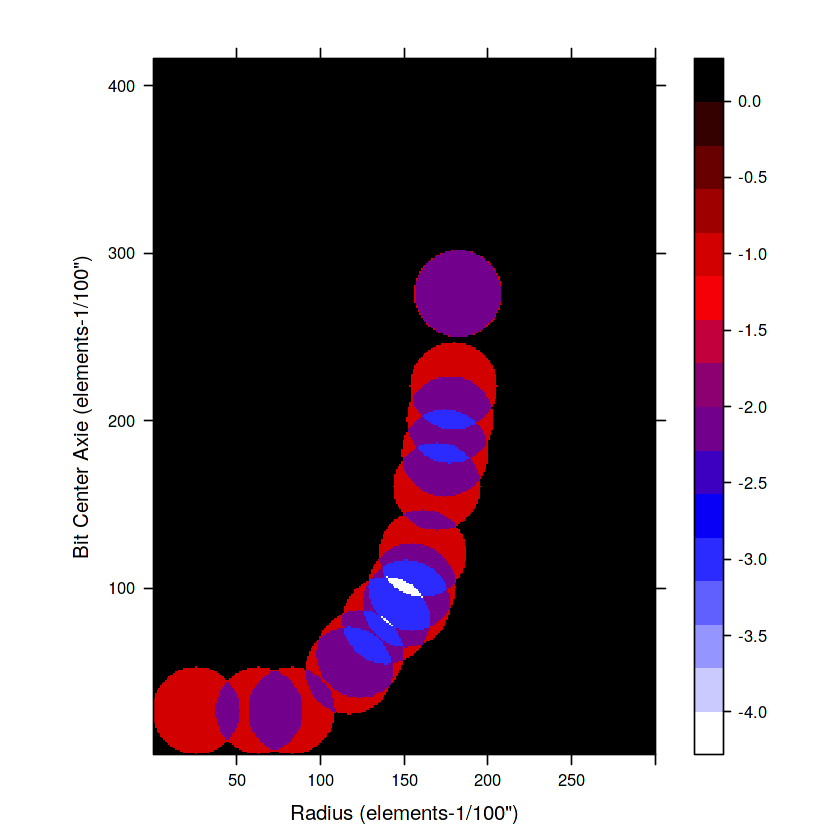

In [4]:
# step 1
# define the size of matrix in accordance with the elements
# The matrix is named matrix base MB

Height  <- Dc*8 # the height of matrix in inches
Width <- Db*1.6/2 # the Width of matrix in inches

# step 2
#define the simulation resolution
elements <- 100 # 1 inches is equal to 100 elements

#define base matrix
BM <- matrix(0,Height*elements,Width*elements)



# step 3
#define the shape function (i.e. circle) and rearrange it base on x


#step 4
#define the min and max of shape in cartesian coordinate
#the circles are on top of x axie and therefore the y min is 0 and the y max is Dc

y_min_cartesian <- 0
y_max_cartesian <- Dc*cos(BR*pi/180)*3

#step 5
# turn y_min_cartesian & y_max_cartesian to elements
y_min_elements <- y_min_cartesian * elements
y_max_elements <- y_max_cartesian * elements



# start for y from down (y_min_elements=0)
# turn it to cartesian value; plug it into the circle equation
# calculate the x in cartesian; turn it back to elements
# turn both the y and x to Matrix base coordinate and update the Matrix base
# loop these procedure till get the maximum y element


Ri <- matrix(0,NOC,1)
Yi <- matrix(0,NOC,1)

y_min_cartesian <- matrix(0,NOC,1)
y_max_cartesian <- matrix(0,NOC,1)

y_min_elements <- matrix(0,NOC,1)
y_max_elements <- matrix(0,NOC,1)
#setwd("C:/Users/DASLAB Hareland 3/OneDrive - Oklahoma A and M System/R calc file/cutter interaction Modeling")
#setwd("/Users/amin/OneDrive - Oklahoma A and M System/R calc file/cutter interaction Modeling")

#CutterPositions <- read.csv('../input/full cutter position editted.csv', header = T)
CutterPositions <- read.csv('../input/full cutter position editted.csv', header = T)


#Cutters distance from the center/ Ri values
Ri[,1] <- CutterPositions[,1]
#Cutters distance from the botom of the bit/ Rc values
Yi[,1] <- CutterPositions[,2]

#ellipse paramters
# B <- cos(BR*pi/180)
# B2 <- B^2

y_min_cartesian <- Yi[,1] - Rc
y_max_cartesian <- Yi[,1] + Rc

y_min_elements <- ceiling(y_min_cartesian * elements)
y_max_elements <- floor(y_max_cartesian * elements)

for (n in 1:NOC) {
    #print(n)

    for (i in y_min_elements[n]:y_max_elements[n]) {
        # print(i)

        #turn y element to cartesian
        y_cartesian <- i/elements
        #shape equation rearraged base on x
        #circle
        x_cartesian_min <- -(Rc^2-((y_cartesian-Yi[n,1])^2))^0.5 + Ri[n,1]
        x_cartesian_max <- (Rc^2-((y_cartesian-Yi[n,1])^2))^0.5 + Ri[n,1]

        # ellipse
        # x_cartesian_min <- -((Rc^2)-(((y_cartesian-Rc)^2)/B2))^0.5 + Ri[n,1]
        # x_cartesian_max <- ((Rc^2)-(((y_cartesian-Rc)^2)/B2))^0.5 + Ri[n,1]

        #turn the x_cartesian_min&max to x_min_elementsmax
        x_min_elements <- ceiling(x_cartesian_min * elements)
        x_max_elements <- floor(x_cartesian_max * elements)
        #turn the y elements coordinate to base matrix coordinate (which would be x inside the matrix)
        X_BM <- -(i-elements * Height)
        #turn the x elements (min and max) to base matrix coordinate (which would be two ymin and ymax inside the matrix)
        y_BM_min <- x_min_elements
        y_BM_max <- x_max_elements

        #loop and update the Base matrix between y_BM_min & y_BM_max
        for (j in y_BM_min:y_BM_max) {
            # print(j)
            #add 1 unit to base matrix as repersentative for circle area
            BM[X_BM,j] <- BM[X_BM,j] - 1
        }
    }
}






#replace those values that are greater than X all together in one line code
# BM <- ifelse(BM > -1, 8, BM)

str(BM)
BM1 <- t(BM)
BM2 <- BM1[,ncol(BM1):1]

col.l <- colorRampPalette(c('white','blue','red','black'))(30)

levelplot(BM2, xlab='Radius (elements-1/100")', ylab='Bit Center Axie (elements-1/100")', col.regions=col.l)

TBM <- table(BM)
TBM
ss <- 0
for (i in 2:8) {

    ss <- TBM[i]+ ss

}
TBM2 <- TBM*100/ss
TBM2

## PDC Bit profile based on cutter poitions


Call:
lm(formula = CutterPositions$y ~ poly(q, 7))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10498 -0.03544  0.00006  0.02054  0.10798 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.25907    0.02115  59.526 9.91e-11 ***
poly(q, 7)1  2.70870    0.08192  33.065 5.99e-09 ***
poly(q, 7)2  1.57298    0.08192  19.201 2.59e-07 ***
poly(q, 7)3  0.73265    0.08192   8.944 4.44e-05 ***
poly(q, 7)4  0.46904    0.08192   5.726 0.000716 ***
poly(q, 7)5  0.28119    0.08192   3.433 0.010948 *  
poly(q, 7)6  0.13714    0.08192   1.674 0.138034    
poly(q, 7)7  0.09558    0.08192   1.167 0.281539    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08192 on 7 degrees of freedom
Multiple R-squared:  0.9956,	Adjusted R-squared:  0.9912 
F-statistic: 227.2 on 7 and 7 DF,  p-value: 1.028e-07


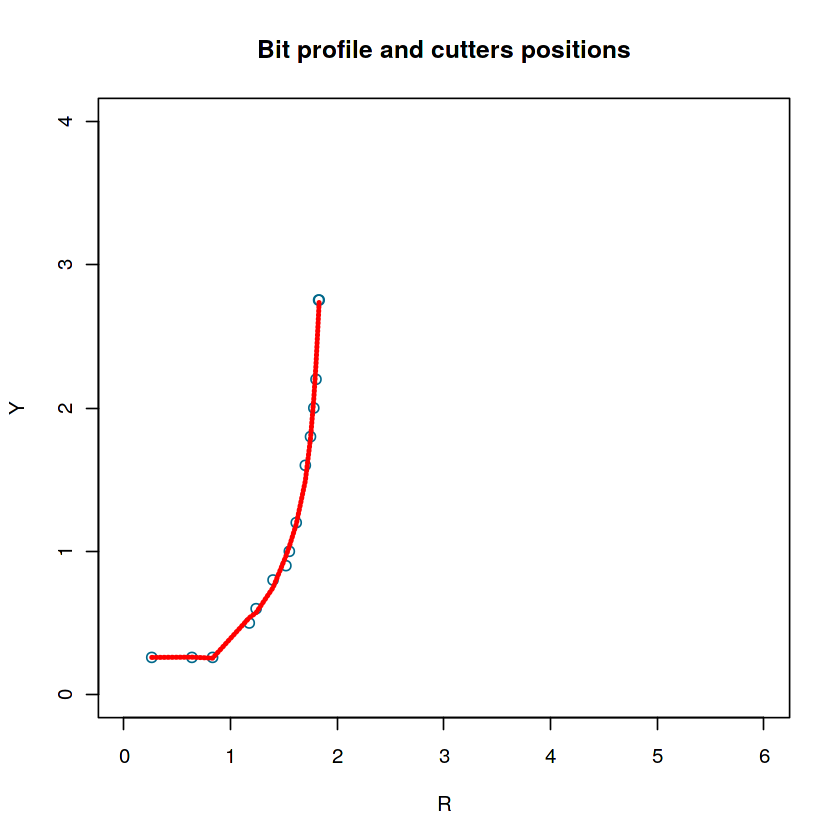

In [5]:



# fit a ploynomial to find the bit body

CutterPositions <- data.frame(CutterPositions)


CutterPositions <- CutterPositions[order(CutterPositions$x),]

q <- CutterPositions$x

plot(q,CutterPositions$y,col='deepskyblue4',xlim = c(0,6),ylim = c(0,4),ylab='Y',xlab='R',main='Bit profile and cutters positions')
# lines(q,CutterPositions$y,col='firebrick1',lwd=3)



model <- lm(CutterPositions$y ~ poly(q,7))

summary(model)

predictedY <- predict(model,data.frame(x=q))

lines(q,predictedY,col='red',lwd=3,lty = 3)